# Playing with ranked war data

dataset is about 6700 wars from january through june of 2025. there's more data in the file in github - just edit ```make_spreadsheets.py``` and re-run if you want to look at more - I eliminated to make sure i had continuity for some of the things below

In [ ]:
import pandas as pd
import seaborn as sns
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

sns.set_theme(style="dark")

wars = pd.read_csv("intermediate/war_pair_data.csv")
wars["start_date"] = pd.to_datetime(wars["start_date"])
wars["end_date"] = pd.to_datetime(wars["end_date"])

rewards = pd.read_csv("intermediate/war_reward_dataset.csv")
rewards["start_date"] = pd.to_datetime(rewards["start_date"])
rewards["end_date"] = pd.to_datetime(rewards["end_date"])

members = pd.read_csv("intermediate/member_participation.csv")

## Wars

### How many / When do they start?


### wars in dataset
**Number of wars:** 6730  
**First war start:** 2025-01-02 00:00:00  
**Last war end:** 2025-07-03 06:00:55  

### when they start


Day,War Count
Thursday,2072
Friday,2073
Saturday,2585


### over time

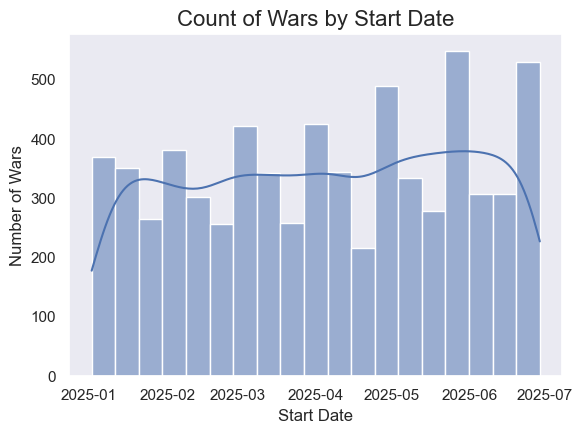

In [37]:
summary_md = f"""
### wars in dataset
**Number of wars:** {len(wars)}  
**First war start:** {wars["start_date"].min()}  
**Last war end:** {wars["end_date"].max()}  

### when they start
"""
display(Markdown(summary_md))

day_table = pd.DataFrame({"Day": day_names, "War Count": day_counts.values})
display(day_table.style.hide(axis="index"))

display(Markdown("### over time"))

plt.figure(figsize=(6, 4.5))
sns.histplot(wars["start_date"], kde=True)
plt.title("Count of Wars by Start Date", fontsize=16)
plt.xlabel("Start Date")
plt.ylabel("Number of Wars")
plt.tight_layout()
plt.show()

## How Long do wars last?

About 48 hours

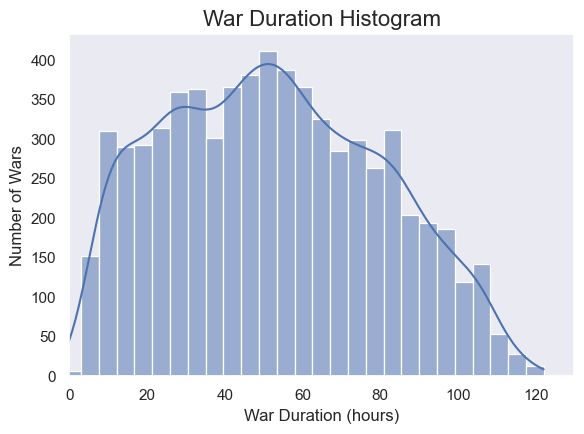

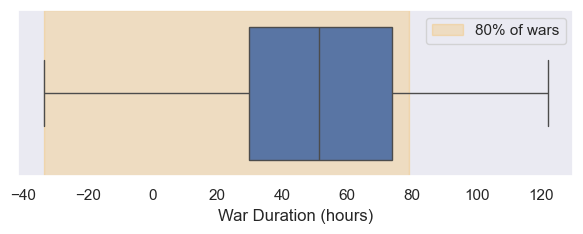

In [50]:
plt.figure(figsize=(6, 4.5))
sns.histplot(wars["duration_hours"], kde=True)
plt.xlim(left=0)
plt.title("War Duration Histogram", fontsize=16)
plt.xlabel("War Duration (hours)")
plt.ylabel("Number of Wars")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 2.5))
sns.boxplot(x=wars["duration_hours"])
q10 = wars["duration_hours"].quantile(0.0)
q90 = wars["duration_hours"].quantile(0.80)
plt.axvspan(q10, q90, color="orange", alpha=0.2, label="80% of wars")
plt.xlabel("War Duration (hours)")

plt.legend()
plt.tight_layout()
plt.show()

## Do factions actually go anywhere?

let's treat each win as +1 and each loss as -1

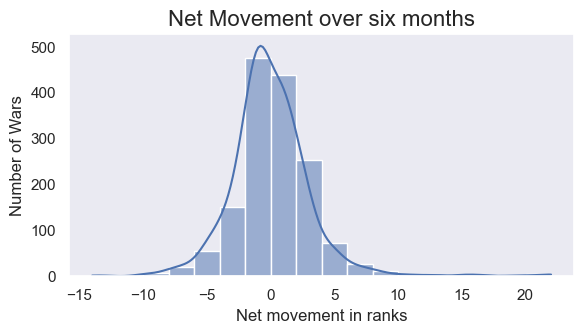

,count,total_won,total_lost,won_minus_lost,earliest_rank_before,last_rank_after
faction_name,,,,,,
$$$,12,3,9,-6,Unranked,Bronze I
$Money Makers$,10,5,5,0,Bronze I,Bronze III
(INQ) Schola Progenium,8,6,2,4,Bronze,Silver I
* 95th Rifles *,1,0,1,-1,Unranked,Unranked
*$KiNG-PiN$*,2,0,2,-2,Unranked,Unranked
...,...,...,...,...,...,...
{WARS} - Elite,13,4,9,-5,Silver I,Silver I
|HT|,23,10,13,-3,Diamond II,Diamond I
~Legionaries~,4,0,4,-4,Bronze I,Bronze


In [58]:
# Aggregate stats for each faction_name using the rewards dataset
def faction_stats(df):
    grouped = df.sort_values("start_date").groupby("faction_name")
    result = pd.DataFrame(
        {
            "count": grouped.size(),
            "total_won": grouped["won"].sum(),
            "total_lost": grouped.size() - grouped["won"].sum(),
            "won_minus_lost": grouped["won"].sum()
            - (grouped.size() - grouped["won"].sum()),
            "earliest_rank_before": grouped.first()["rank_before"],
            "last_rank_after": grouped.last()["rank_after"],
        }
    )
    return result


faction_summary = faction_stats(rewards)


plt.figure(figsize=(6, 3.5))
sns.histplot(faction_summary["won_minus_lost"], kde=True, binwidth=2)
plt.title("Net Movement over six months", fontsize=16)
plt.xlabel("Net movement in ranks")
plt.ylabel("Number of Wars")
plt.tight_layout()
plt.show()

display(faction_summary)

## (to be continued)